### Time Series introduction

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, Layout
import micropip
await micropip.install("ipympl")

%matplotlib widget

x = np.linspace(0, 10, 500)

def gen_seasons(phase=0, frequency=0, amplitude=0):
    y = np.cos(frequency*x +phase) * amplitude
    return y

def gen_offset(offset_loc=0, offset_size=0):
    offset = np.zeros_like(x)
    for ind, i in enumerate(x):
        if i >= offset_loc:
            offset[ind] = offset_size
    return offset

def gen_trend(trend_slope=0):
    y = trend_slope * x
    return y

def gen_noise(std=0):
    np.random.seed(int(std*100))
    y = np.random.normal(0, std, size=x.shape)
    return y

def generate_data(trend_slope=0, std=0, phase=0, amplitude=0, frequency=0, offset_loc=5, offset_size=0):
    y = gen_trend(trend_slope) + gen_noise(std) + gen_offset(offset_loc, offset_size) + gen_seasons(phase, frequency, amplitude)
    return y

# Function to plot the data
def plot_data(trend_slope=0, phase=0, amplitude=1, frequency=1, offset_location=5, offset_size=0, standard_dev=0):
    y = generate_data(trend_slope, standard_dev, phase, amplitude, frequency, offset_location, offset_size)
    y_trend = gen_trend(trend_slope)
    y_seas = gen_seasons(phase, frequency, amplitude)
    y_offs = gen_offset(offset_location, offset_size)
    y_noise = gen_noise(standard_dev)

    fig, axs = plt.subplots(5, 1, figsize=(16, 9))
    # plt.figure(figsize=(10, 6))
    axs[0].plot(x, y, label="Generated Data")

    axs[0].set_title("Data with Optional Trend and Noise")
    axs[0].grid(True)
    axs[0].tick_params(axis='x', labelbottom=False)  # Remove x-tick labels

    axs[1].plot(x, y_trend, label="Trend")
    axs[1].grid(True)
    axs[1].legend()
    axs[1].tick_params(axis='x', labelbottom=False)  # Remove x-tick labels
    axs[1].set_ylim([-20, 20])

    # plt.ylabel('Different time series components', loc='bottom')
    axs[2].plot(x, y_seas, label="Seasonality")
    axs[2].grid(True)
    axs[2].legend()
    axs[2].tick_params(axis='x', labelbottom=False)  # Remove x-tick labels
    axs[2].set_ylim([-5.5, 5.5])

    axs[3].plot(x, y_offs, label="Offset")
    axs[3].grid(True)
    axs[3].legend()
    axs[3].tick_params(axis='x', labelbottom=False)  # Remove x-tick labels
    axs[3].set_ylim([-5.5, 5.5])

    axs[4].plot(x, y_noise, label="Noise")
    axs[4].grid(True)
    axs[4].legend()
    axs[4].set_ylim([-3, 3])

    

    # plt.tight_layout()
    plt.xlabel('Time')


interactive(children=(FloatSlider(value=1.0, description='Trend Slope', layout=Layout(width='40%'), max=2.0, m…

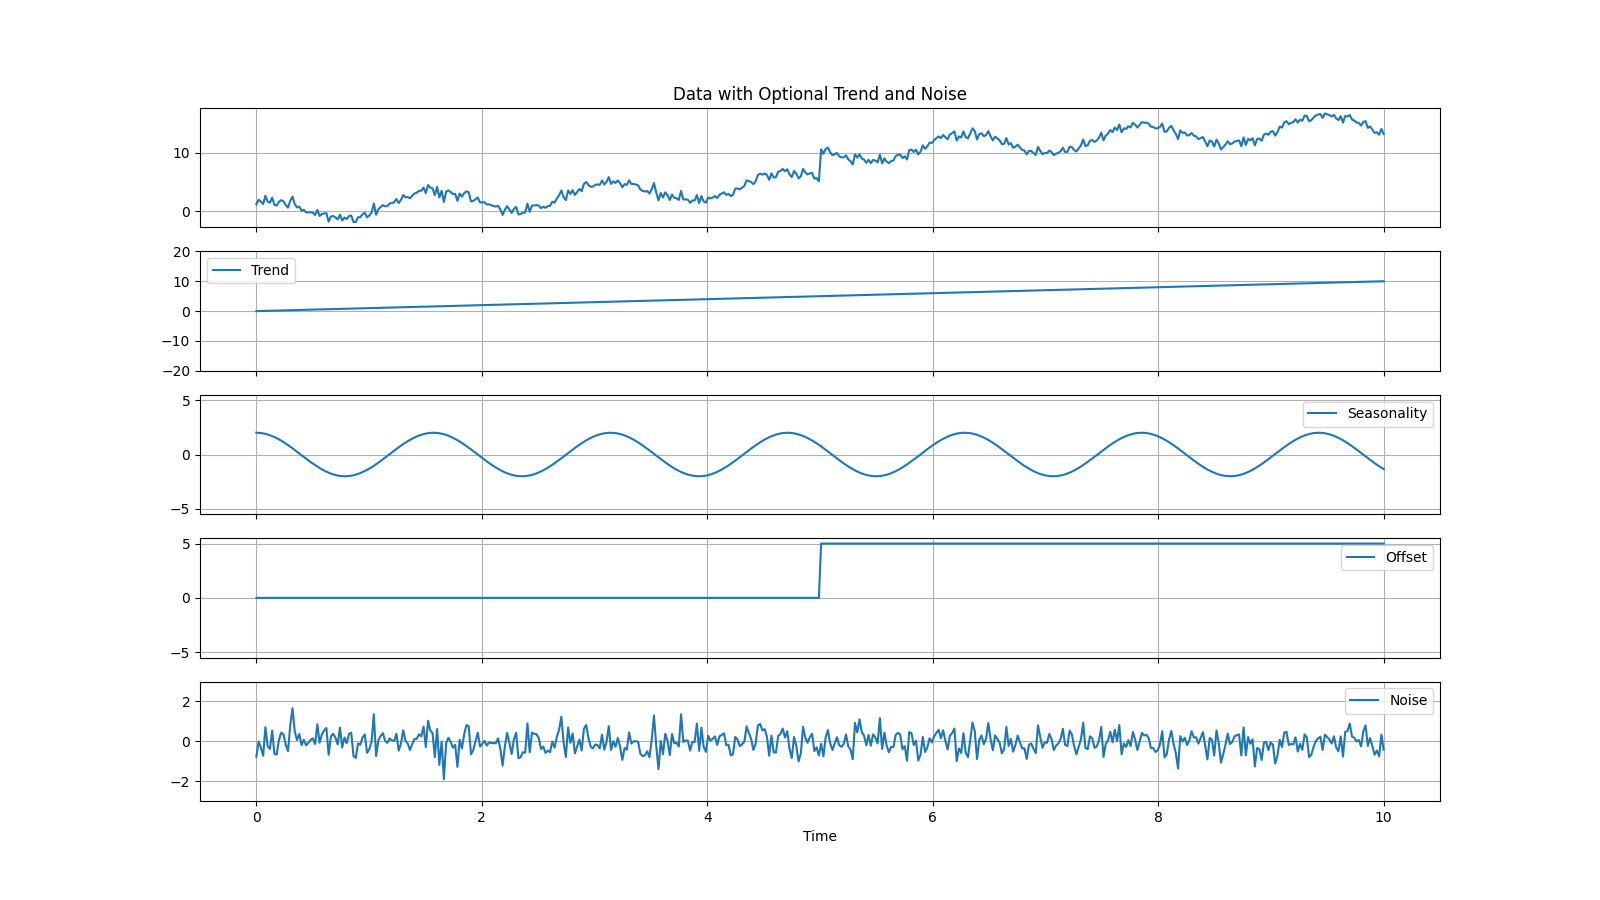

In [4]:
    
# Creating interactive widgets
style = {'description_width': 'initial'}
interact(plot_data,
         trend_slope=widgets.FloatSlider(value=1, min=-2.0, max=2.0, step=0.05, description="Trend Slope", style=style, layout=Layout(width='40%')),
         phase=widgets.FloatSlider(value=0, min=0, max=2*np.pi, step=0.05,description="phase", style=style, layout=Layout(width='40%')),
         amplitude=widgets.FloatSlider(value=2, min=0, max=5.0, step=0.05,description="amplitude", style=style, layout=Layout(width='40%')),
         frequency=widgets.FloatSlider(value=4, min=0, max=10.0, step=0.05,description="frequency", style=style, layout=Layout(width='40%')),
         offset_location=widgets.FloatSlider(value=5, min=0, max=10, step=0.1, description="offset location", style=style, layout=Layout(width='40%')),
         offset_size=widgets.FloatSlider(value=5, min=-10, max=10, step=0.1, description="offset size", style=style, layout=Layout(width='40%')),
         standard_dev=widgets.FloatSlider(value=0.5, min=0, max=2, step=0.005,description="Standard deviation", style=style, layout=Layout(width='40%')));
        